# <center> Lab 5 Examples 
## <center>    Sequences and Series

In this Lab we will learn how to work with sequences and series, how to determine their convergence and the difficulty of determining convergence of infinite series. We will also introduce a new library `mpmath`. 

**Video**: https://youtu.be/V6QhEakwyvw

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import mpmath as mm        #  <---- New Library

sp.var('n')


n

## 1. Sequences and their limits

To define the sequence and find their limits, we will use SymPy library. Suppose we have a sequence $a_n=\frac{1}{2n+1}$. We want to define it, plot first 30 terms and find the limit. First, we define it:

In [2]:
an=sp.sequence(1/(2*n+1), (n,1,sp.oo))
an

SeqFormula(1/(2*n + 1), (n, 1, oo))

Next, let's plot first 30 terms:

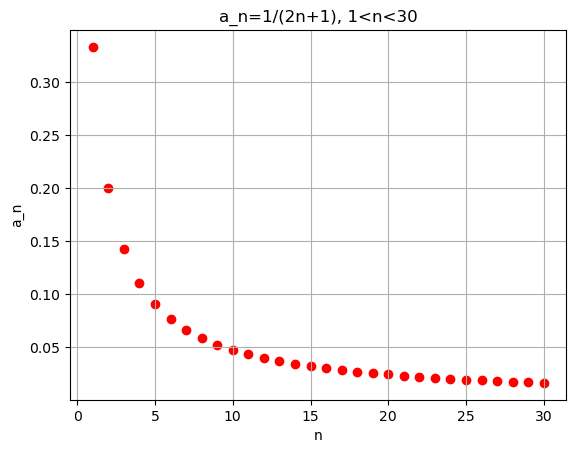

In [4]:
nval=np.arange(1,31,1)                   # Note upper bound is 31, since last number isn't being used.

fig=plt.figure()

plt.scatter(nval,an[:30], color='red')   # an[:30] means take first 30 elements. This is the same syntax as for lists and arrays.


plt.title("a_n=1/(2n+1), 1<n<30")
plt.xlabel('n')
plt.ylabel('a_n')
plt.grid()

plt.show()

Finally, let's find the limit. You can't use `an` directly because it is a list object. We need to use it as a expression of the n-th term. For that we will use `.formula` method.

In [5]:
sp.limit_seq(an.formula,n)

0

The command `limit_seq` assumes $n$ is an integer already. We can use regular limit as well, but it will not assume that, which may lead to incorrect answers sometimes.

In [6]:
sp.limit(an.formula,n,sp.oo)

0

## 2. Series and Partial Sums

Suppose we have a infinite series $\sum_{n=1}^{\infty} \frac{(-1)^n}{n}$. Our goal here is to look at first 30 partial sums for this series. We start by defining expression of terms and then a sequence of partial sums:

In [7]:
an=(-1)**n/n

PartialSums = [sp.Sum(an, (n, 1, k)) for k in np.arange(1,31,1)]
PartialSums

[Sum((-1)**n/n, (n, 1, 1)),
 Sum((-1)**n/n, (n, 1, 2)),
 Sum((-1)**n/n, (n, 1, 3)),
 Sum((-1)**n/n, (n, 1, 4)),
 Sum((-1)**n/n, (n, 1, 5)),
 Sum((-1)**n/n, (n, 1, 6)),
 Sum((-1)**n/n, (n, 1, 7)),
 Sum((-1)**n/n, (n, 1, 8)),
 Sum((-1)**n/n, (n, 1, 9)),
 Sum((-1)**n/n, (n, 1, 10)),
 Sum((-1)**n/n, (n, 1, 11)),
 Sum((-1)**n/n, (n, 1, 12)),
 Sum((-1)**n/n, (n, 1, 13)),
 Sum((-1)**n/n, (n, 1, 14)),
 Sum((-1)**n/n, (n, 1, 15)),
 Sum((-1)**n/n, (n, 1, 16)),
 Sum((-1)**n/n, (n, 1, 17)),
 Sum((-1)**n/n, (n, 1, 18)),
 Sum((-1)**n/n, (n, 1, 19)),
 Sum((-1)**n/n, (n, 1, 20)),
 Sum((-1)**n/n, (n, 1, 21)),
 Sum((-1)**n/n, (n, 1, 22)),
 Sum((-1)**n/n, (n, 1, 23)),
 Sum((-1)**n/n, (n, 1, 24)),
 Sum((-1)**n/n, (n, 1, 25)),
 Sum((-1)**n/n, (n, 1, 26)),
 Sum((-1)**n/n, (n, 1, 27)),
 Sum((-1)**n/n, (n, 1, 28)),
 Sum((-1)**n/n, (n, 1, 29)),
 Sum((-1)**n/n, (n, 1, 30))]

Note, we defined it as a list of sums from 1 to $k$ as $k$ changes from 1 to 30. For example, here is a sixth term:

In [8]:
PartialSums[5]

Sum((-1)**n/n, (n, 1, 6))

In [9]:
sp.N(PartialSums[5])

-0.616666666666667

Now, let's plot it. This is similar to what we did with sequences:

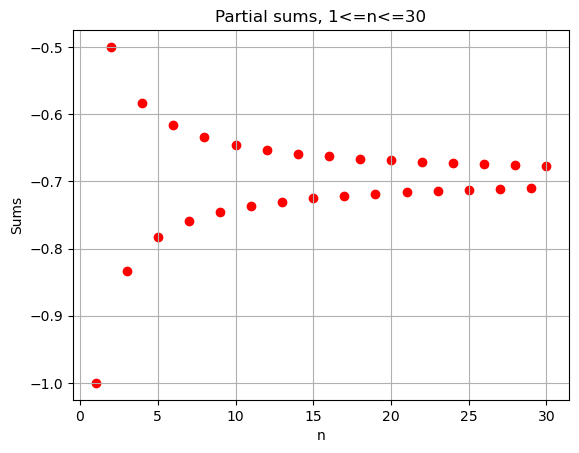

In [10]:
nval=np.arange(1,31,1)

fig=plt.figure()

plt.scatter(nval,PartialSums[:], color='red')


plt.title("Partial sums, 1<=n<=30")
plt.xlabel('n')
plt.ylabel('Sums')
plt.grid()

plt.show()

From the graph we can see that the sum seems to converge to something around -0.7 or -0.69. We can try evaluating the limit of partial sums. However, using limit of the sequence will not work as our partial sum sequence is not infinite. We will use different methods. First one is `sp.summation` and another method is `mm.nsum` from the new library:

In [11]:
sp.N(sp.summation(an,(n,1,sp.oo)))

-0.693147180559945

In [12]:
mm.nsum(lambda n: (-1)**n/n, [1, mm.inf])

mpf('-0.69314718055994529')

We got the same answer in both case and it matches what we see on the plot. This confirms convergence.

Note about `nsum`: It is a different math library, so if you need to use more complicated functions like sine for instance, you have to use its own sine function (e.g. `mm.sin(n)`). Inside, the `nsum` commands we used `lambda`, this is the same as what we did before when we defined functions through it. Finally, the interval `[1, mm.inf]` is the the interval of integers over which we take aur partial sums. In this case with start with $n=1$ and end with $n=\infty$

## 3. Limitation of technology in determining convergence of series

Unfortunatelly, there isn't a universal way of determining whether the series converges or diverges. This means methods discussed above may fail. Let's look a a couple of examples and see what we can say about it.

**1.** $\sum_{n=1}^{\infty}\frac{1}{n}$

In [13]:
an=1/n

In [14]:
sp.N(sp.summation(an,(n,1,sp.oo)))

oo

In [15]:
mm.nsum(lambda n: 1/n,[1, mm.inf])

mpf('9.4633820989410271')

In this case, `sp.summation` worked well, but `nsum` failed. Command `nsum` will never tell you whether the sum is divergent. It will just calculate partial sums for some large $n$. But if the series is convergent, it will compute the limit quite fast.

**2.** $\sum_{n=1}^{\infty}sin(n)$

In [16]:
an=sp.sin(n)
sp.N(sp.summation(an,(n,1,sp.oo)))

0.e+129

In [17]:
mm.nsum(lambda n: mm.sin(n),[1, mm.inf])

mpf('0.915243860856226')

In this case, both gave us some numbers. However, notice they are different. This suggests that the series is divergent, since if it was convergent, we would have gotten similar answers. Another thing of note in this example, notice how much faster `nsum` provided the answer in comparison to `summation`.
We could have also used graphs of partial sums to make our analysis even more precise. 

Final note: These limitation highlight something very important. We have to understand theory when we are analysing results. Just because command gives us the answer doesn't mean it is a correct answer. Therefore, while the use of technology is incredibly helpful, it has to be used cautiously. You have to always question the result and make sure that it makes sense. 